In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rouge

In [1]:
def get_results(summarizer,folder,start,end):
    all_hypothesis = []
    all_references = []
    for i in range(start,end):
          num=str(i)
          if(len(num)==1):
                num='0'+'0'+num
          elif(len(num)==2):
                num='0'+num
          r=open("/Users/shreyabanerjee/Summarizer/BBC News Summary/Summaries/"+folder+"/"+num+".txt", "r")
          reference=r.read()
          all_references.append(reference)
          h= open("/Users/shreyabanerjee/Summarizer/BBC News Summary/"+summarizer+"/"+folder+"/"+num+".txt", "r")
          hypothesis=h.read()
          all_hypothesis.append(hypothesis)
    return all_hypothesis,all_references

In [2]:
import sklearn.metrics as metric
def get_score(all_hypothesis, all_references):
    apply_avg = 'Avg'
    evaluator = rouge.Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                               max_n=4,
                               limit_length=True,
                               length_limit=100,
                               length_limit_type='words',
                               apply_avg=apply_avg,
                               alpha=0.5, # Default F1_score
                               weight_factor=1.2,
                               stemming=True)
    scores = evaluator.get_scores(all_hypothesis, all_references)
    #print(scores)
    for key,value in scores.items():
        print(key.upper()+'\n')
        print("F: "+str(value['f'])+"  R: "+str(value['r'])+"  P: "+str(value['p'])+"\n")
    return scores

In [16]:
def draw_graph(results,model):
    df = pd.DataFrame([['p','rouge-1',results['rouge-1']['p']],['p','rouge-2',results['rouge-2']['p']],['p','rouge-3',results['rouge-3']['p']],['r','rouge-1',results['rouge-1']['r']],
                   ['r','rouge-2',results['rouge-2']['r']],['r','rouge-3',results['rouge-3']['r']]],columns=[model,'metric','val'])
    df.pivot(model, "metric", "val").plot(kind='bar')
    plt.show()

In [11]:
candidate_gpt2_business,reference_gpt2_business=get_results("Gpt2_Summaries","business",1,511)
results_gpt2 = get_score(candidate_gpt2_business,reference_gpt2_business)

ROUGE-4

F: 0.3567754315757471  R: 0.3103068775260924  P: 0.43285420714181566

ROUGE-1

F: 0.5485852121554948  R: 0.4824706322686857  P: 0.6537269702265736

ROUGE-2

F: 0.4049686501619386  R: 0.3536827114386218  P: 0.48767192499349

ROUGE-3

F: 0.3732885619360899  R: 0.32520614950559074  P: 0.4514598097562836

ROUGE-L

F: 0.4737969577108065  R: 0.42286286540448953  P: 0.5494589109165612

ROUGE-W

F: 0.1930962774731449  R: 0.12556492759740484  P: 0.43446026658936937



In [19]:
candidate_bert_business,reference_bert_business=get_results("Bert_Summaries","business",1,511)
results_bert = get_score(candidate_bert_business,reference_bert_business)

ROUGE-4

F: 0.3173061692109652  R: 0.2740415111937426  P: 0.39580511092004456

ROUGE-1

F: 0.513711872437754  R: 0.4490308340675888  P: 0.6267125577918853

ROUGE-2

F: 0.3632003891243103  R: 0.3151768693515823  P: 0.4484890826967956

ROUGE-3

F: 0.3324034194877118  R: 0.2876167551198056  P: 0.4127782402864315

ROUGE-L

F: 0.4519556034079308  R: 0.4002905162702853  P: 0.5355872750079056

ROUGE-W

F: 0.18096445672606534  R: 0.11720128130501045  P: 0.42112332629972554



In [24]:
candidate_bart_business,reference_bart_business=get_results("Bart2_Summaries","business",1,511)
results_bart = get_score(candidate_bart_business,reference_bart_business)

ROUGE-4

F: 0.2286312807862947  R: 0.2103458578233445  P: 0.2554597997778402

ROUGE-1

F: 0.5056936203517117  R: 0.4686282999039368  P: 0.558307675520842

ROUGE-2

F: 0.31344923888365345  R: 0.28913600407364287  P: 0.34862583947845693

ROUGE-3

F: 0.2593060802503736  R: 0.23878562627239727  P: 0.28923397230393416

ROUGE-L

F: 0.3941206945403351  R: 0.3683255357545122  P: 0.42923334194569024

ROUGE-W

F: 0.14574990282139721  R: 0.09743972294874483  P: 0.29601241716434684



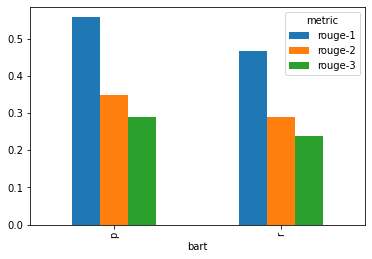

In [25]:
draw_graph(results_bart,'bart')

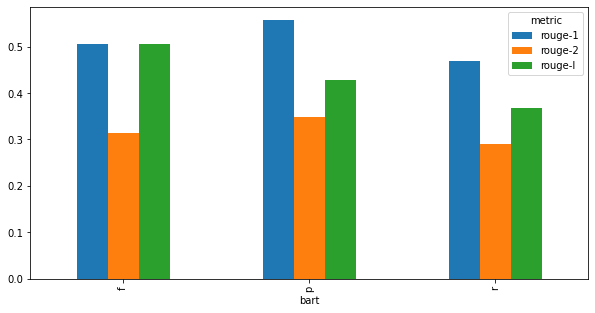

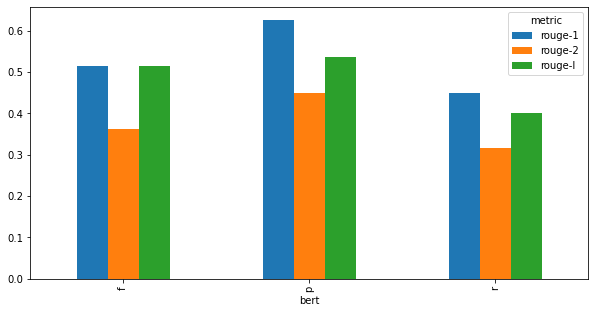

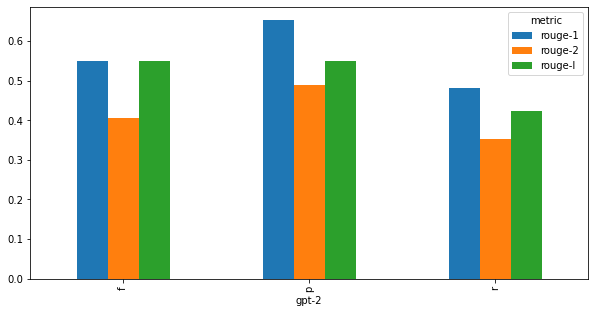

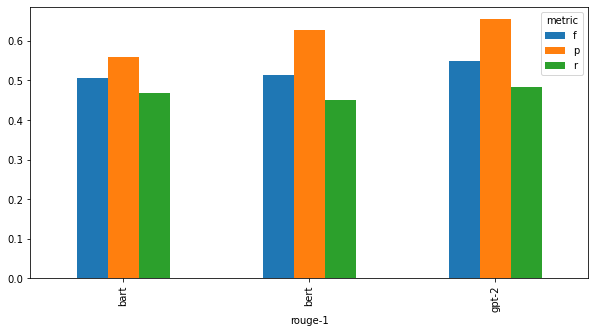

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#bart results
df1 = pd.DataFrame([['p','rouge-1',results_bart['rouge-1']['p']],['p','rouge-2',results_bart['rouge-2']['p']],['p','rouge-l',results_bart['rouge-l']['p']],['r','rouge-1',results_bart['rouge-1']['r']],
                   ['r','rouge-2',results_bart['rouge-2']['r']],['r','rouge-l',results_bart['rouge-l']['r']],['f','rouge-1',results_bart['rouge-1']['f']],['f','rouge-2',results_bart['rouge-2']['f']],['f','rouge-l',results_bart['rouge-1']['f']]],columns=['bart','metric','val'])
#bert results
df2 = pd.DataFrame([['p','rouge-1',results_bert['rouge-1']['p']],['p','rouge-2',results_bert['rouge-2']['p']],['p','rouge-l',results_bert['rouge-l']['p']],['r','rouge-1',results_bert['rouge-1']['r']],
                   ['r','rouge-2',results_bert['rouge-2']['r']],['r','rouge-l',results_bert['rouge-l']['r']],['f','rouge-1',results_bert['rouge-1']['f']],['f','rouge-2',results_bert['rouge-2']['f']],['f','rouge-l',results_bert['rouge-1']['f']]],columns=['bert','metric','val'])
#gpt-2 results
df3 = pd.DataFrame([['p','rouge-1',results_gpt2['rouge-1']['p']],['p','rouge-2',results_gpt2['rouge-2']['p']],['p','rouge-l',results_gpt2['rouge-l']['p']],['r','rouge-1',results_gpt2['rouge-1']['r']],
                   ['r','rouge-2',results_gpt2['rouge-2']['r']],['r','rouge-l',results_gpt2['rouge-l']['r']],['f','rouge-1',results_gpt2['rouge-1']['f']],['f','rouge-2',results_gpt2['rouge-2']['f']],['f','rouge-l',results_gpt2['rouge-1']['f']]],columns=['gpt-2','metric','val'])

#comparision of 3 methods based on results of rouge-1(or any variant)
df4 = pd.DataFrame([['bart','p',results_bart['rouge-1']['p']],['bart','r',results_bart['rouge-1']['r']],['bart','f',results_bart['rouge-1']['f']],
                    ['bert','p',results_bert['rouge-1']['p']],['bert','r',results_bert['rouge-1']['r']],['bert','f',results_bert['rouge-1']['f']],
                    ['gpt-2','p',results_gpt2['rouge-1']['p']],['gpt-2','r',results_gpt2['rouge-1']['r']],['gpt-2','f',results_gpt2['rouge-1']['f']]],columns=['rouge-1','metric','val'])

df1.pivot("bart", "metric", "val").plot(kind='bar',figsize=(10,5))
plt.show()

df2.pivot("bert", "metric", "val").plot(kind='bar',figsize=(10,5))
plt.show()

df3.pivot("gpt-2", "metric", "val").plot(kind='bar',figsize=(10,5))
plt.show()

df4.pivot("rouge-1", "metric", "val").plot(kind='bar',figsize=(10,5))
plt.show()